<a href="https://colab.research.google.com/github/Irene-Zheng/Zyraland/blob/main/Module4Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Starter Code

In [5]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [6]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
#spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder.master("local[*]").enableHiveSupport().getOrCreate()

In [3]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [7]:
# Task: Delete the "bostonh" database
database_name = "bostonh"
drop_database_query = f"DROP DATABASE IF EXISTS {database_name} CASCADE"

# Execute the query using spark.sql
#spark.sql(drop_database_query)

In [8]:
spark.sql("CREATE DATABASE BostonH")

DataFrame[]

In [9]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  bostonh|
|  default|
+---------+



In [10]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12

In [11]:
dataset = spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)

In [12]:
dataset.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

In [32]:
dataset.write.mode("overwrite").saveAsTable("bostonh.bos_housing")

In [33]:
dataset.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [12]:
# Task 1: Retrieve and display the first 5 rows of the dataset
dataset = spark.sql("SELECT * FROM bostonh.bos_housing LIMIT 7")
dataset.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43|58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012|66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [13]:
# Task 1: Find and report the total number of records in the dataset
total_records = spark.sql("SELECT COUNT(*) AS total_records FROM bostonh.bos_housing").collect()[0]["total_records"]
print("Total number of records in the dataset:", total_records)

Total number of records in the dataset: 506


# Module 4 Assignment

In [13]:
dataset.write.mode("overwrite").saveAsTable("bh_data")
dataset.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [14]:
import matplotlib.pyplot as plt
import numpy as np

##Task 1 Data Overview

In [15]:
#Retrieve and display the first 5 rows of the dataset to get a sense of the data's structure.
spark.sql("SELECT * FROM bh_data LIMIT 5").show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [16]:
#Find and report the total number of records in the dataset.
total_records = spark.sql("SELECT COUNT(*) AS total_records FROM bh_data").collect()[0]["total_records"]
print("Total number of records in the dataset:", total_records)

Total number of records in the dataset: 506


## Task 2: Descriptive Statistics

In [17]:
#Calculate and display basic statistics (mean, standard deviation, min, max) for the "medv" (median home value) column.
medv_sta = spark.sql("SELECT AVG(medv) AS mean, STDDEV(medv) AS standard_deviation, MIN(medv) AS min, MAX(medv) AS max FROM bh_data").collect()
print("Mean of median home value is:", medv_sta[0]["mean"])
print("Standard deviation of median home value is:", medv_sta[0]["standard_deviation"])
print("Min of median home value is:", medv_sta[0]["min"])
print("Max of median home value is:", medv_sta[0]["max"])


Mean of median home value is: 22.532806324110698
Standard deviation of median home value is: 9.197104087379815
Min of median home value is: 5.0
Max of median home value is: 50.0


In [18]:
#Calculate and display the mean "rm" (average number of rooms per dwelling).
mean_rm = spark.sql("SELECT AVG(rm) AS mean FROM bh_data").collect()[0]["mean"]
print("Mean of average number of rooms per dwelling is:", mean_rm)

Mean of average number of rooms per dwelling is: 6.284634387351787


## Task 3: Data Exploration

In [19]:
#Identify the property with the highest crime rate ("crim"). Provide details about this property.
spark.sql("SELECT * FROM bh_data ORDER BY crim DESC LIMIT 1").show()

+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968|91.9|1.4165| 24|666|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+



In [20]:
#Find and report the property with the lowest median home value ("medv"). Include its details.
spark.sql("SELECT * FROM bh_data ORDER BY medv LIMIT 1").show()

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2|396.9|30.59| 5.0|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+



## Task 4: Data Distribution Analysis

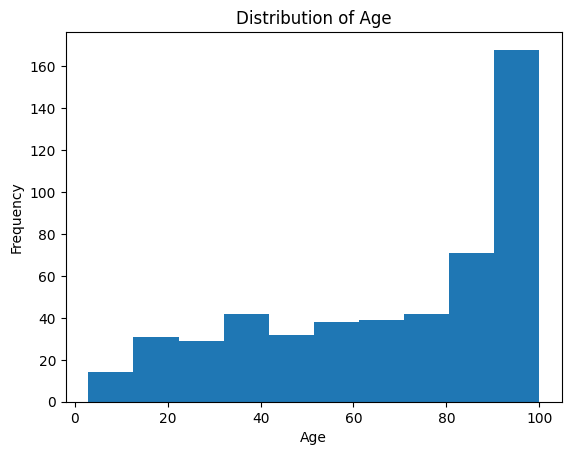

In [21]:
#Create a histogram showing the distribution of the "age" column.
age_data = spark.sql("SELECT age FROM bh_Data").toPandas()
plt.hist(age_data)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.show()

In [22]:
#Calculate and report the percentage of properties with a "chas" value of 1 (indicating proximity to the Charles River).
chas_1 = spark.sql("SELECT COUNT(chas) AS count FROM bh_data WHERE chas = 1").collect()[0]["count"]
pct_chas_1 = round(chas_1/total_records*100,2)
print("The percentage of properties with a 'chas' value of 1 is:", pct_chas_1, "%")

The percentage of properties with a 'chas' value of 1 is: 6.92 %


## Task 5: Correlation Analysis

In [23]:
#Calculate the correlation coefficient between "rm" and "medv." Explain the relationship between the average number of rooms and median home value.
rm_medv = spark.sql("SELECT rm,medv FROM bh_Data").toPandas()
rm_medv_coef = rm_medv.corr()
rm_medv_coef = round(rm_medv_coef['medv'].loc[rm_medv_coef.index[0]],4)
print("The correlation coefficient between the average number of rooms and median home value is:", rm_medv_coef)

The correlation coefficient between the average number of rooms and median home value is: 0.6954


In [24]:
#Investigate if there is any correlation between "ptratio" (pupil-teacher ratio) and "nox" (nitrogen oxide concentration). Report your findings.
ptratio_nox = spark.sql("SELECT ptratio,nox FROM bh_Data").toPandas()
ptratio_nox_coef = ptratio_nox.corr()
ptratio_nox_coef = ptratio_nox_coef['ptratio'].loc[ptratio_nox_coef.index[1]]
ptratio_nox_coef = round(ptratio_nox_coef, 4)
print("The correlation coefficient between the pupil-teacher ratio and nitrogen oxide concentration:", ptratio_nox_coef, ". Therefore, there is a correlation between these two variables.")

The correlation coefficient between the pupil-teacher ratio and nitrogen oxide concentration: 0.1889 . Therefore, there is a correlation between these two variables.


## Task 6: Advanced Querying

In [25]:
#Write a HiveQL query to identify and display the top 5 neighborhoods with the highest median home values ("medv").
spark.sql("SELECT * FROM bh_data ORDER BY medv DESC LIMIT 5").show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|1.51902| 0.0|19.58|   1|0.605|8.375|93.9| 2.162|  5|403|   14.7|388.45| 3.32|50.0|
|0.01381|80.0| 0.46|   0|0.422|7.875|32.0|5.6484|  4|255|   14.4|394.23| 2.97|50.0|
|2.01019| 0.0|19.58|   0|0.605|7.929|96.2|2.0459|  5|403|   14.7| 369.3|  3.7|50.0|
|1.83377| 0.0|19.58|   1|0.605|7.802|98.2|2.0407|  5|403|   14.7|389.61| 1.92|50.0|
|1.46336| 0.0|19.58|   0|0.605|7.489|90.8|1.9709|  5|403|   14.7|374.43| 1.73|50.0|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [26]:
#Calculate and report the average property age for neighborhoods with a "chas" value of 1 compared to those with "chas" value of 0.
age_chas1 = spark.sql("SELECT age FROM bh_data WHERE chas = 1").toPandas()
age_chas0 = spark.sql("SELECT age FROM bh_data WHERE chas = 0").toPandas()
ave_age_chas1 = np.mean(age_chas1)
ave_age_chas0 = np.mean(age_chas0)
print("The average property age for neighborhoods with a 'chas' value of 1 is:", ave_age_chas1,"\n", "The average property age for neighborhoods with a 'chas' value of 0 is:", ave_age_chas0)

The average property age for neighborhoods with a 'chas' value of 1 is: 77.5 
 The average property age for neighborhoods with a 'chas' value of 0 is: 67.91167728237791


## Task 7: Visualization

In [34]:
#Create a Hive view named "property_age_view" that includes the "age" and "medv" columns.
spark.sql("CREATE OR REPLACE VIEW property_age_view AS SELECT age,medv FROM bh_data")
spark.sql("SELECT * FROM property_age_view LIMIT 5").show()

+----+----+
| age|medv|
+----+----+
|65.2|24.0|
|78.9|21.6|
|61.1|34.7|
|45.8|33.4|
|54.2|36.2|
+----+----+



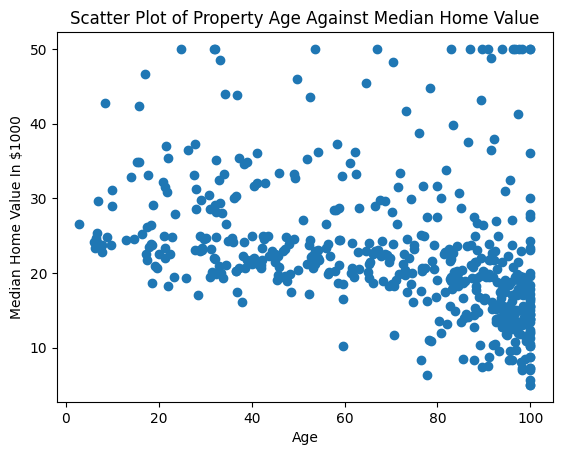

In [43]:
#Plot a scatter plot of property age against median home value using a data visualization tool of your choice.
pd_property_age = spark.sql("SELECT * FROM property_age_view").toPandas()
pd_property_age.head()
plt.scatter(pd_property_age['age'], pd_property_age['medv'])
plt.xlabel('Age')
plt.ylabel('Median Home Value In $1000')
plt.title('Scatter Plot of Property Age Against Median Home Value')
plt.show()

## Task 8: Outliers Detection

In [48]:
#Write a query to identify and report properties with a "crim" value greater than 10 (considered as potential outliers).
spark.sql("SELECT crim From bh_data WHERE crim > 10").show(5)
crim_10_count = spark.sql("SELECT COUNT(crim) FROM bh_data WHERE crim > 10").collect()[0]['count(crim)']
print("There are ", crim_10_count, "obervations in the database with a crim value greater than 10")

+-------+
|   crim|
+-------+
|13.5222|
|11.1081|
|18.4982|
|19.6091|
| 15.288|
+-------+
only showing top 5 rows

There are  54 obervations in the database with a crim value greater than 10


In [49]:
#Discuss the significance of detecting outliers in data analysis.
#Outliers are critical in data analysis because they can affect the accuracy of the data and skew the results of hypothesis tests.

## Task 9: Hypothesis Testing

In [56]:
#Formulate a hypothesis about the impact of the "rm" (average number of rooms) on median home value.
#We already created a PandaDataFrame in the above sessions that include rm and medv
#Check the dataframe
rm_medv.count()


rm      506
medv    506
dtype: int64

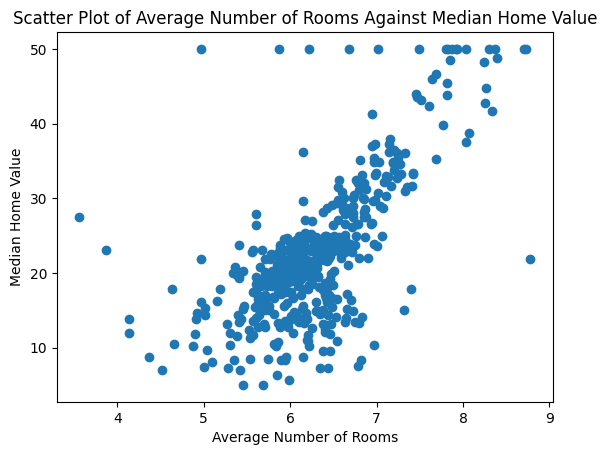

In [58]:
rm_medv.head(5)
plt.scatter(rm_medv['rm'], rm_medv['medv'])
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Home Value')
plt.title('Scatter Plot of Average Number of Rooms Against Median Home Value')
plt.show()


###From the plot above we can see that there may be a relationship between rm and medv
###Hypothesis: H0: As rm increases, medv do not increases vs H1:As rm increases, medv also increases

In [61]:
#Conduct a hypothesis test using HiveQL to determine if there is a statistically significant relationship between these variables.
from scipy.stats import pearsonr
test_statistic = pearsonr(rm_medv['rm'], rm_medv['medv'])
test_statistic

PearsonRResult(statistic=0.6953599470715394, pvalue=2.4872288710080976e-74)

In [63]:
print("The Pearson correlation coefficient is 0.6954 indicates there is a moderate positive linear relationship between Average Number of Rooms and Median Home Value.", "\n", "The p-value is smaller than 0.05, reject the null hypothesis, there is a strong relationshipt between rm and medv. In the context of the question, when rm increases, medv also increases.")

The Pearson correlation coefficient is 0.6954 indicates there is a moderate positive linear relationship between Average Number of Rooms and Median Home Value. 
 The p-value is smaller than 0.05, reject the null hypothesis, there is a strong relationshipt between rm and medv. In the context of the question, when rm increases, medv also increases.
